In [127]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [128]:
# Load the training and testing sets from a pickle file
with open('../data/datasets.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

In [129]:
# Convert y_train and y_test to numpy arrays
y_train = np.array(y_train, copy=True)
y_test = np.array(y_test, copy=True)

## Linear Regression

In [130]:
# Initialize Linear Regression model
lr = LinearRegression()

# Perform cross-validation and calculate negative mean squared error scores
cv_scores = cross_val_score(lr, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())


Cross-validation scores: [-0.00329393 -0.00289024 -0.00299792]
Average cross-validation score: -0.003060700333825417


In [131]:
# Initialize Linear Regression model, fit it to the training data, predict win percentages for test data, and calculate MSE
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [132]:
# Function to plot distribution of a column using Kernel Density Estimation (KDE) plot and Q-Q plot
def plot_distribution(column, distribution='norm'):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    sns.kdeplot(column, ax=axs[0])
    stats.probplot(column, dist=distribution, plot=axs[1])
    plt.show()

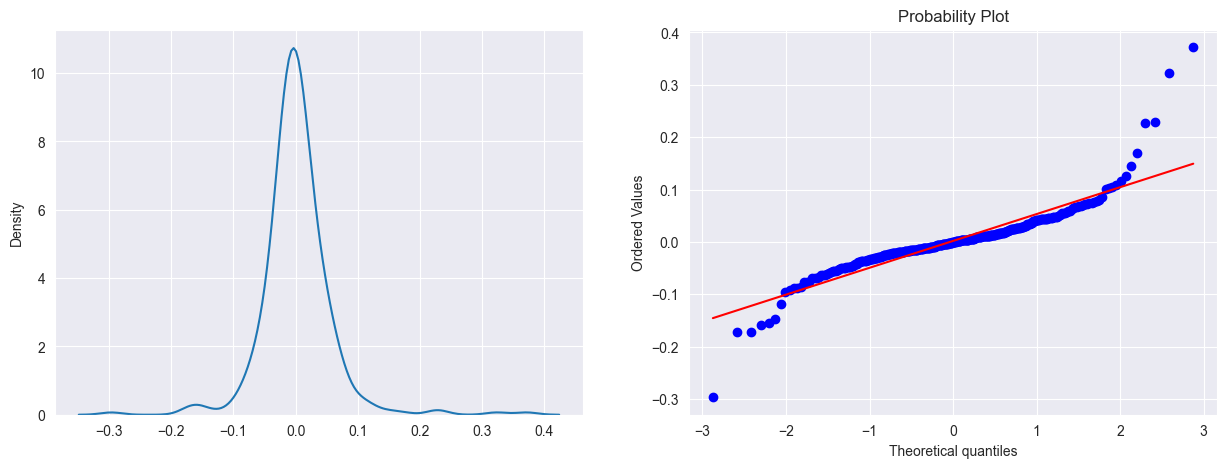

In [133]:
plot_distribution(residuals)

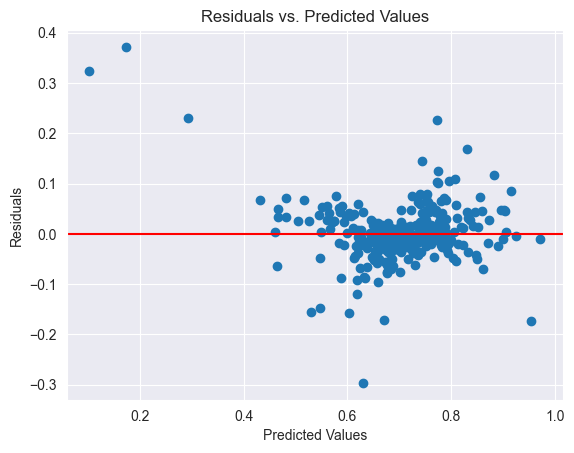

In [134]:
# Plot residuals versus predicted values to check for heteroscedasticity
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0 for reference
plt.show()